In [1]:
import pandas as pd
import requests
import json
import pprint
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score, recall_score, f1_score, precision_recall_curve, roc_curve

C:\Users\shahj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\requests\__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.2.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn(


In [2]:
df = pd.read_csv('traffic_crashes.csv')
df

,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,...,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH
0,1f1186e0411acc6dcb255905375964f9721a1deb19f463...,2023-07-07 23:30:00,30,UNKNOWN,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",PEDESTRIAN,NOT DIVIDED,STRAIGHT AND LEVEL,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,23,6,7
1,cc5809e5187918dcbd27eaf4fdf3f1cc8b16a0af90b6bb...,2017-04-15 17:30:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,17,7,4
2,8d7ed21f732dcf4c622c5647b51811874a5e801fa6243a...,2020-06-08 12:00:00,30,NO CONTROLS,NO CONTROLS,UNKNOWN,DAYLIGHT,SIDESWIPE SAME DIRECTION,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,12,2,6
3,a826ba79cb0d2b43d99aa7a2cbc8d06fc0615ab9b03b22...,2024-04-21 05:00:00,25,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,5,1,4
4,e8ce402d816159db6198d2b148fbefa79538614d348a68...,2019-10-26 15:50:00,15,NO CONTROLS,NO CONTROLS,RAIN,DAYLIGHT,PARKED MOTOR VEHICLE,PARKING LOT,STRAIGHT AND LEVEL,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,15,7,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8265,a8f8f886669d38e58e664c23ee2674a2a8f7e16bae5c5b...,2019-04-02 18:00:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,18,3,4
8266,5508887f8db62b99ad90ddce0e98ce628cb5fe1a71524a...,2021-03-19 08:46:00,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,ANGLE,T-INTERSECTION,STRAIGHT AND LEVEL,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,8,6,3
8267,ba2cde0fb7612cf98f428389d1fafc9909686c07b71028...,2023-08-19 10:00:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10,7,8
8268,7ed1975f6d04230c34cd856811ef46c7c5b399c5fb071a...,2017-01-03 14:00:00,35,NO CONTROLS,NO CONTROLS,FOG/SMOKE/HAZE,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,14,3,1


In [3]:
df = df.drop(columns = ['CRASH_RECORD_ID',	'CRASH_DATE','WEATHER_CONDITION','SEC_CONTRIBUTORY_CAUSE','STREET_NO','STREET_DIRECTION','STREET_NAME','NUM_UNITS','INJURIES_FATAL', 'INJURIES_INCAPACITATING',
       'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT',
       'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN','CRASH_HOUR'])

WEATHER_CONDITION - new group

In [4]:
df.columns

Index(['POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'CRASH_TYPE',
       'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE', 'MOST_SEVERE_INJURY',
       'INJURIES_TOTAL', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH'],
      dtype='object')

In [5]:
df['CRASH_MONTH'].value_counts()

10    793
9     726
12    712
8     712
11    707
7     699
5     681
3     662
1     657
2     649
4     644
6     628
Name: CRASH_MONTH, dtype: int64

In [6]:
top = df['TRAFFIC_CONTROL_DEVICE'].value_counts().head(6).index
df = df[df['TRAFFIC_CONTROL_DEVICE'].isin(top)]

In [7]:
df

,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,MOST_SEVERE_INJURY,INJURIES_TOTAL,CRASH_DAY_OF_WEEK,CRASH_MONTH
0,30,UNKNOWN,UNKNOWN,"DARKNESS, LIGHTED ROAD",PEDESTRIAN,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,$500 OR LESS,FAILING TO YIELD RIGHT-OF-WAY,NO INDICATION OF INJURY,0.0,6,7
1,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"$501 - $1,500",NOT APPLICABLE,NO INDICATION OF INJURY,0.0,7,4
2,30,NO CONTROLS,NO CONTROLS,DAYLIGHT,SIDESWIPE SAME DIRECTION,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,UNKNOWN,NO DEFECTS,NO INJURY / DRIVE AWAY,"$501 - $1,500",UNABLE TO DETERMINE,NO INDICATION OF INJURY,0.0,2,6
3,25,NO CONTROLS,NO CONTROLS,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",PHYSICAL CONDITION OF DRIVER,NONINCAPACITATING INJURY,1.0,1,4
4,15,NO CONTROLS,NO CONTROLS,DAYLIGHT,PARKED MOTOR VEHICLE,PARKING LOT,STRAIGHT AND LEVEL,WET,NO DEFECTS,NO INJURY / DRIVE AWAY,"$501 - $1,500",NOT APPLICABLE,NO INDICATION OF INJURY,0.0,7,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8265,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,NO INDICATION OF INJURY,0.0,3,4
8266,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,DAYLIGHT,ANGLE,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",FAILING TO YIELD RIGHT-OF-WAY,NO INDICATION OF INJURY,0.0,6,3
8267,30,NO CONTROLS,NO CONTROLS,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,NO INDICATION OF INJURY,0.0,7,8
8268,35,NO CONTROLS,NO CONTROLS,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,WET,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",NOT APPLICABLE,NO INDICATION OF INJURY,0.0,3,1


In [8]:
top = df['FIRST_CRASH_TYPE'].value_counts().head(12).index
df = df[df['FIRST_CRASH_TYPE'].isin(top)]

In [9]:
top = df['TRAFFICWAY_TYPE'].value_counts().head(11).index
df = df[df['TRAFFICWAY_TYPE'].isin(top)]

In [10]:
top = df['ALIGNMENT'].value_counts().head(4).index
df = df[df['ALIGNMENT'].isin(top)]

In [11]:
top = df['ROADWAY_SURFACE_COND'].value_counts().head(5).index
df = df[df['ROADWAY_SURFACE_COND'].isin(top)]

In [12]:
top = df['INJURIES_TOTAL'].value_counts().head(6).index
df = df[df['INJURIES_TOTAL'].isin(top)]

In [13]:
df.isna().sum()

POSTED_SPEED_LIMIT         0
TRAFFIC_CONTROL_DEVICE     0
DEVICE_CONDITION           0
LIGHTING_CONDITION         0
FIRST_CRASH_TYPE           0
TRAFFICWAY_TYPE            0
ALIGNMENT                  0
ROADWAY_SURFACE_COND       0
ROAD_DEFECT                0
CRASH_TYPE                 0
DAMAGE                     0
PRIM_CONTRIBUTORY_CAUSE    0
MOST_SEVERE_INJURY         0
INJURIES_TOTAL             0
CRASH_DAY_OF_WEEK          0
CRASH_MONTH                0
dtype: int64

In [14]:
defect_mapping = {
    'NO DEFECTS': 'not defected',
    'UNKNOWN': 'unknown',
    # Any other case should be considered as "defected"
}

# Map existing values to the new categories
df['DEFECT_STATUS'] = df['ROAD_DEFECT'].map(defect_mapping).fillna('defected')

In [15]:
df = df.drop(columns = ['ROAD_DEFECT'])

In [16]:
cause_counts = df['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

# Determine the causes that meet or exceed the threshold
threshold = 50
valid_causes = cause_counts[cause_counts >= threshold].index

# Filter the DataFrame to keep only rows with valid causes
df = df[df['PRIM_CONTRIBUTORY_CAUSE'].isin(valid_causes)]

In [17]:
df

,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,CRASH_TYPE,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,MOST_SEVERE_INJURY,INJURIES_TOTAL,CRASH_DAY_OF_WEEK,CRASH_MONTH,DEFECT_STATUS
0,30,UNKNOWN,UNKNOWN,"DARKNESS, LIGHTED ROAD",PEDESTRIAN,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,NO INJURY / DRIVE AWAY,$500 OR LESS,FAILING TO YIELD RIGHT-OF-WAY,NO INDICATION OF INJURY,0.0,6,7,unknown
1,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO INJURY / DRIVE AWAY,"$501 - $1,500",NOT APPLICABLE,NO INDICATION OF INJURY,0.0,7,4,not defected
2,30,NO CONTROLS,NO CONTROLS,DAYLIGHT,SIDESWIPE SAME DIRECTION,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,UNKNOWN,NO INJURY / DRIVE AWAY,"$501 - $1,500",UNABLE TO DETERMINE,NO INDICATION OF INJURY,0.0,2,6,not defected
3,25,NO CONTROLS,NO CONTROLS,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",PHYSICAL CONDITION OF DRIVER,NONINCAPACITATING INJURY,1.0,1,4,not defected
4,15,NO CONTROLS,NO CONTROLS,DAYLIGHT,PARKED MOTOR VEHICLE,PARKING LOT,STRAIGHT AND LEVEL,WET,NO INJURY / DRIVE AWAY,"$501 - $1,500",NOT APPLICABLE,NO INDICATION OF INJURY,0.0,7,10,not defected
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8265,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO INJURY / DRIVE AWAY,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,NO INDICATION OF INJURY,0.0,3,4,not defected
8266,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,DAYLIGHT,ANGLE,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",FAILING TO YIELD RIGHT-OF-WAY,NO INDICATION OF INJURY,0.0,6,3,not defected
8267,30,NO CONTROLS,NO CONTROLS,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,NO INDICATION OF INJURY,0.0,7,8,not defected
8268,35,NO CONTROLS,NO CONTROLS,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,WET,NO INJURY / DRIVE AWAY,"OVER $1,500",NOT APPLICABLE,NO INDICATION OF INJURY,0.0,3,1,not defected


In [18]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

for i in df.columns:
    df[i] = label.fit_transform(df[i])

In [19]:
df

,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,CRASH_TYPE,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,MOST_SEVERE_INJURY,INJURIES_TOTAL,CRASH_DAY_OF_WEEK,CRASH_MONTH,DEFECT_STATUS
0,9,5,5,1,6,5,1,3,1,0,5,2,0,5,6,2
1,9,4,1,3,11,5,1,0,1,1,11,2,0,6,3,1
2,9,1,2,3,10,2,1,3,1,1,14,2,0,1,5,1
3,8,1,2,1,4,6,1,0,0,2,13,3,1,0,3,1
4,6,1,2,3,4,8,1,4,1,1,11,2,0,6,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8265,9,4,1,3,11,5,1,0,1,2,10,2,0,2,3,1
8266,9,3,1,3,0,9,1,0,0,2,5,2,0,5,2,1
8267,9,1,2,3,4,6,1,0,1,2,14,2,0,6,7,1
8268,10,1,2,3,4,6,1,4,1,2,11,2,0,2,0,1


In [20]:
y = df[['MOST_SEVERE_INJURY']]
x = df.drop(columns = ['MOST_SEVERE_INJURY'])

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [22]:
X_train

,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,CRASH_TYPE,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,INJURIES_TOTAL,CRASH_DAY_OF_WEEK,CRASH_MONTH,DEFECT_STATUS
4869,9,3,1,0,10,5,1,0,1,2,8,0,1,10,1
7380,9,1,2,3,11,2,1,0,1,2,10,0,6,5,1
8195,9,5,5,3,5,5,1,0,0,0,6,1,5,8,1
1352,9,3,1,3,11,4,1,4,0,2,0,0,6,11,1
731,8,1,2,3,10,2,1,0,1,1,14,0,5,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5350,9,3,5,5,0,7,1,0,0,1,14,3,6,2,2
3544,10,4,1,0,7,5,1,0,1,2,6,0,0,4,1
1786,8,1,2,0,0,2,1,0,1,2,5,0,5,9,1
2830,9,4,1,1,11,4,1,0,1,0,5,0,3,1,1


In [23]:
y_train

,MOST_SEVERE_INJURY
4869,2
7380,2
8195,3
1352,2
731,2
...,...
5350,1
3544,2
1786,2
2830,2


In [24]:
if len(set(X_train.index) & set(X_test.index)) == 0:
    print("Training and test datasets are disjoint.")
else:
    print("Training and test datasets are not disjoint.")

Training and test datasets are disjoint.


In [25]:
kernel = ['poly','sigmoid','linear']
c = [1.0,2.0,4.0,8.0]

In [26]:
from sklearn.svm import SVC

In [27]:
results = []

for k in kernel:
    for i in c:
        cla = SVC(C=i, kernel=k) 
        cla.fit(X_train, y_train)
        accuracy = cla.score(X_test, y_test)
        results.append([k, i, accuracy])

results_df = pd.DataFrame(results, columns=['Kernel', 'Cost', 'Accuracy'])


results_df

C:\Users\shahj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shahj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shahj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

,Kernel,Cost,Accuracy
0,poly,1.0,0.943979
1,poly,2.0,0.945026
2,poly,4.0,0.942408
3,poly,8.0,0.940838
4,sigmoid,1.0,0.851832
5,sigmoid,2.0,0.840838
6,sigmoid,4.0,0.835079
7,sigmoid,8.0,0.830366
8,linear,1.0,0.943455
9,linear,2.0,0.943455


C:\Users\shahj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


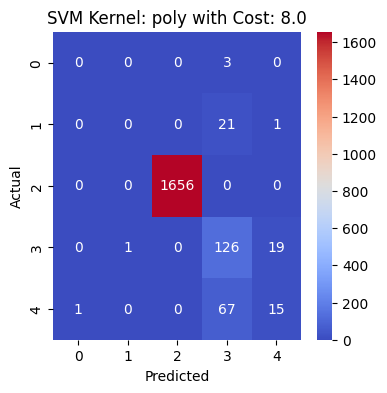

C:\Users\shahj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


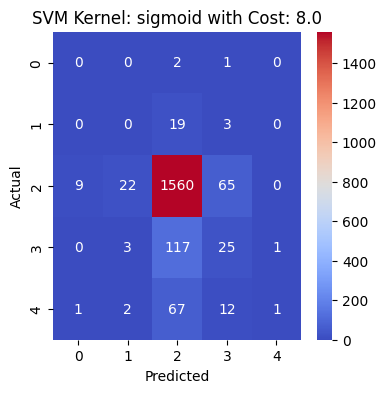

C:\Users\shahj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


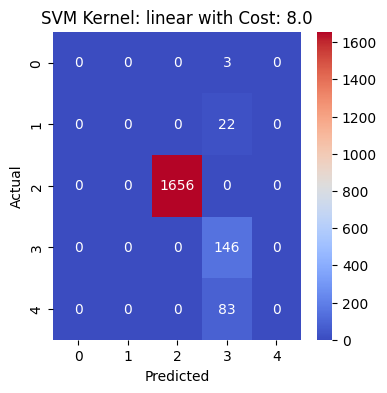

In [30]:
for k in kernel:
    cla = SVC(C = 8, kernel=k)
    cla.fit(X_train,y_train)
    y_pred = cla.predict(X_test)
    cm = confusion_matrix(y_test.values, y_pred)
    plt.figure(figsize=(4,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('SVM Kernel: '+ k +' with Cost: '+str(i))
    plt.show()